In [0]:
!mkdir data

# New Section

In [0]:
cd data/

/content/data


In [0]:
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pineapple.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cake.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/candle.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/car.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/fork.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/The%20Eiffel%20Tower.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/axe.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bed.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bread.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/hat.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/knife.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/diamond.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eye.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/door.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/mountain.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/star.npy

In [0]:
cd ..

/content


In [0]:
import glob
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.utils import np_utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import models
import imageio as im

from random import randint
import numpy as np
import os
from PIL import Image

In [0]:
N_Objects = 21
Objects = {0:"Apple",1:"Banana",2:"Grape",3:"Pineapple",4:"Cake",5:"Candle",6:"Car",7:"Fork",8:"Eiffel",9:"Airplane",10:"Axe",11:"Bed",12:"Bread",13:"Cat",14:"Hat",15:"Knife",16:"Diamond",17:"Eye",18:"Door",19:"Mountain",20:"Star"}

N = 5000
N_EPOCHS = 20
files = ["apple.npy","banana.npy","grapes.npy","pineapple.npy","cake.npy","candle.npy","car.npy","fork.npy","The Eiffel Tower.npy","airplane.npy","axe.npy","bed.npy","bread.npy","cat.npy","hat.npy","knife.npy","diamond.npy","eye.npy","door.npy","mountain.npy","star.npy"]

In [0]:
def load(dir,files):
  data = []
  for file in files:
    f = np.load(dir+file)
    new_f = []
    for i in range(len(f)):
      x = f[i]
      x = np.reshape(f[i],(28,28))
      x = np.expand_dims(x,axis = 0)
      x = np.reshape(f[i], (28,28,1))
      new_f.append(x)
    f = new_f
    data.append(f);
  return data


def visualize(array):
  array = np.reshape(array,(28,28))
  img = Image.fromarray(array)
  return img


def normalize(data):
  return np.interp(data,[0,255],[-1,1])

def denormalize(data):
  return np.interp(data,[-1,1],[0,255])
def set_limit(arrays,n):
  new = []
  for array in arrays:
    i = 0
    for item in array:
      if i == n:
        break
      new.append(item)
      i+=1
  return new

def make_labels(N1,N2):
  labels =[]
  for i in range(N1):
    labels+=[i]*N2
  return labels



objects = load("data/",files)

In [0]:
visualize(objects[15][1])

In [0]:
print("done")
objects = set_limit(objects,N)
objects = map(normalize,objects)
labels = make_labels(N_Objects,N)
print("done")

x_train, x_test, y_train, y_test = tts(objects, labels, test_size=0.25)
Y_train = np_utils.to_categorical(y_train,N_Objects)
Y_test = np_utils.to_categorical(y_test,N_Objects)

done
done


In [0]:
model = Sequential()
model.add( Conv2D( 32 , kernel_size=(3,3),activation='relu' ,input_shape = (28,28,1) ) )
#model.add( Conv2D(64,(3,3),activation='relu',) )
#model.add( Conv2D(128,(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(N_Objects,activation='softmax'))



In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(np.array(x_train),np.array(Y_train),batch_size=32,epochs = N_EPOCHS)
print("Train completed")

<Figure size 432x288 with 0 Axes>

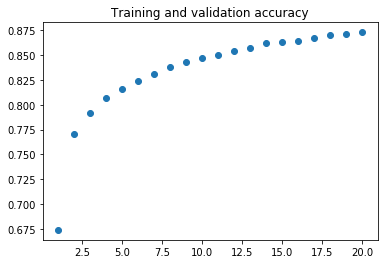

<Figure size 432x288 with 0 Axes>

In [0]:
model.save('model_5k_20e_32.h5')
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label = 'Training acc')
plt.title('Training and validation accuracy')

plt.savefig('5k_20e_32.png')
plt.figure()

In [0]:
model.summary()
preds = model.predict(np.array(x_test))
print(preds)
score = 0
for i in range(len(preds)):
  if np.argmax(preds[i])==y_test[i] :
    score+=1
print((float)(score)/len(preds))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 21)                2709      
Total para

(28, 28, 1)


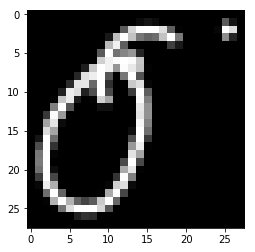

(1, 28, 28)


In [0]:
#Testing to show image
k = objects[0].copy()
k = denormalize(k)
print(k.shape)
img = image.array_to_img(k)
imgAsArray = image.img_to_array(img,'channels_first')
#print(img_tensor)
plt.imshow(imgAsArray[0],'gray')
plt.show()
print(imgAsArray.shape)

(1, 28, 28)


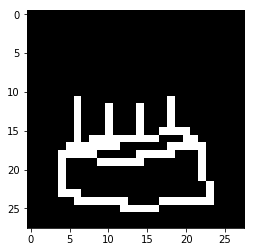

In [0]:
img_path = 'untitled.png'
img = image.load_img(img_path, target_size=(28, 28),color_mode = 'grayscale')
imgAsArray = image.img_to_array(img,'channels_first')
imgAsArray /= 255.
print(imgAsArray.shape)
plt.imshow(imgAsArray[0],'gray')
plt.show()

In [0]:
toTest = []
imgAsArray = image.img_to_array(img)
imgAsArray = np.reshape(imgAsArray,(28,28,1))
toTest.append(imgAsArray)
#print(toTest)
toTest = normalize(toTest)
resultOfPrediciton = model.predict(np.array(toTest))


print(resultOfPrediciton)
print(Objects[np.argmax(resultOfPrediciton[0])])
#print(np.array(toTest))

[[1.7816068e-09 3.4557613e-07 9.5743962e-07 1.2277568e-11 7.7978319e-01
  2.0084210e-05 2.5386589e-07 7.5277356e-08 4.6602754e-06 1.2811016e-08
  7.7402052e-12 1.4387764e-06 8.3127015e-05 8.3549467e-06 2.1917768e-01
  1.4846208e-06 9.8485380e-11 5.3926252e-10 9.1830880e-04 2.9605481e-08
  6.2990613e-11]]
Cake


(1, 13, 13, 32)


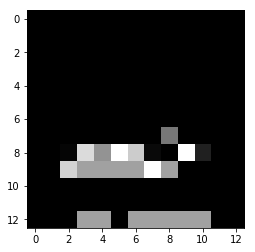

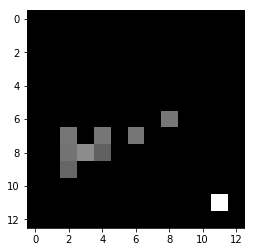

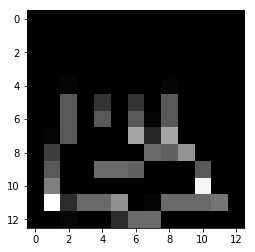

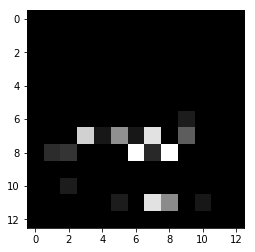

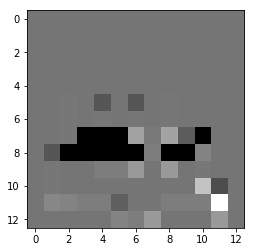

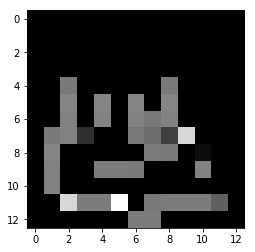

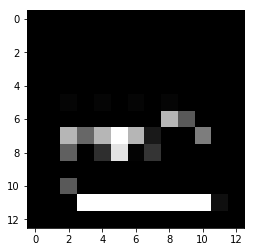

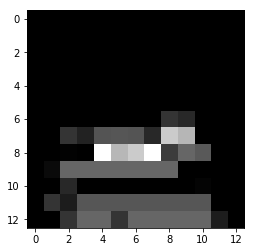

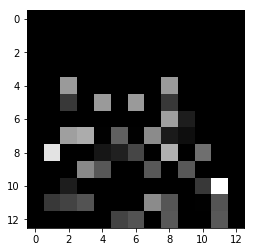

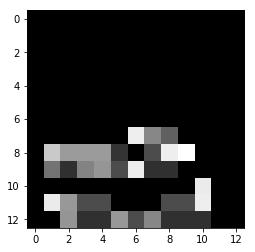

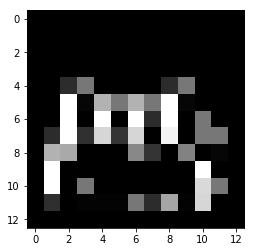

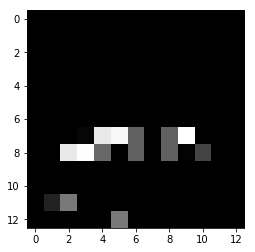

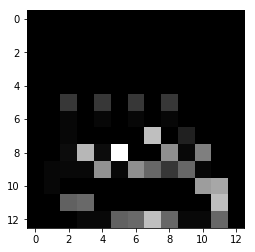

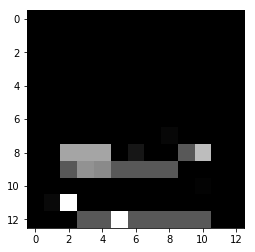

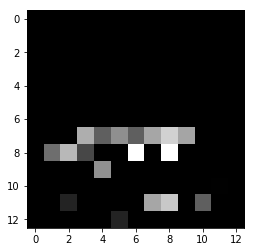

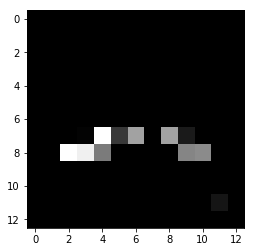

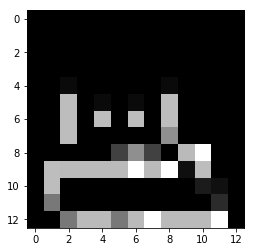

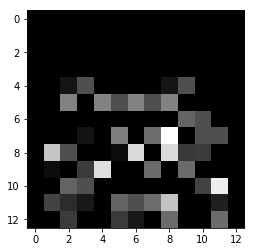

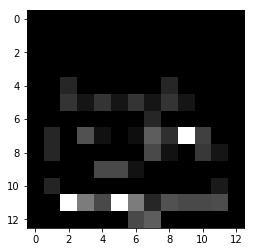

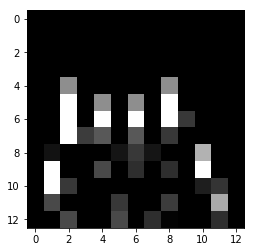

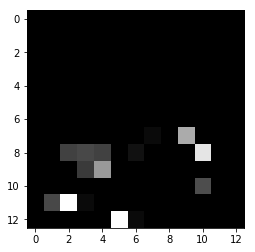

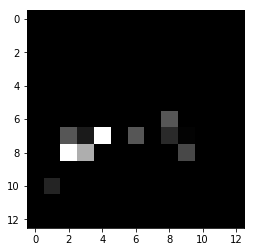

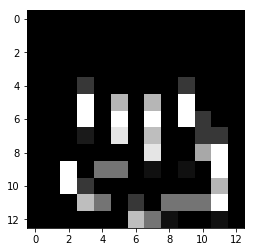

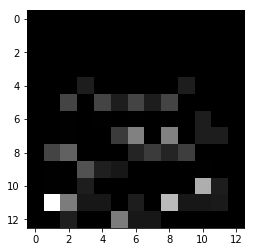

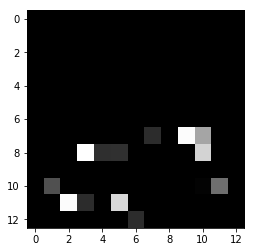

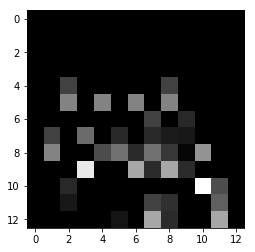

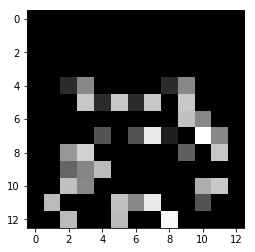

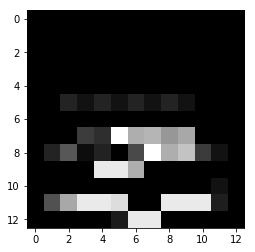

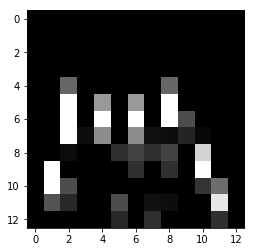

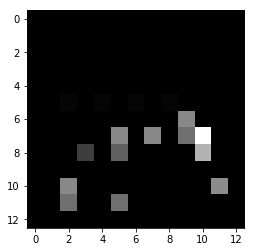

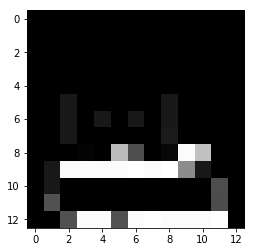

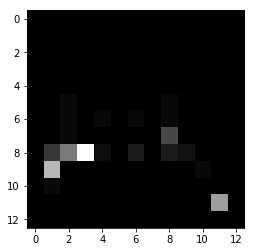

In [0]:
layer_outputs = [layer.output for layer in model.layers[:6]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(toTest)  #REVISE THIS PART
# Creates a model that will return these outputs, given the model input
first_layer_activation = activations[1]
print(first_layer_activation.shape)
for i in range(32):
#   k = first_layer_activation[0, :, :, i].copy()
#   #k = denormalize(k)
#   k = k.reshape(26,26,1)
#   img = image.array_to_img(k)
#   img.save("img"+ str(i)+".png")
  
  plt.imshow(first_layer_activation[0, :, :, i],'gray')
  plt.show()